# Logistic Regression on Ionosphere Dataset

In [1]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("F:/assignments/Sem 6 Assignments/ML Assignment 1/Q3/ionosphere_data_kaggle.csv")
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


### Replacing g and b with 1 and 0 in the label column

In [3]:
data['label'].replace({'g':1,'b':0},inplace=True)
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


## Splitting Dataset into 90% train 10% test

In [4]:
train_,test=model_selection.train_test_split(data, test_size=0.1, train_size=0.9)

In [5]:
stats=pd.DataFrame()
stats["mean"]=train_.mean()
stats["Var"]=train_.var()
stats

,mean,Var
feature1,0.892063,0.096593
feature2,0.000000,0.000000
feature3,0.642893,0.238592
feature4,0.051843,0.192843
feature5,0.608174,0.254543
feature6,0.123541,0.213319
feature7,0.555684,0.226843
feature8,0.118215,0.278598
feature9,0.501287,0.260881
feature10,0.189137,0.244225


In [6]:
stats['Var'].nlargest(5)

feature15    0.430329
feature19    0.394385
feature13    0.388738
feature17    0.385899
feature21    0.364187
Name: Var, dtype: float64

## Plotting Histograms of the Features with the highest variances (top 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027AC8F32EC8>]],
      dtype=object)

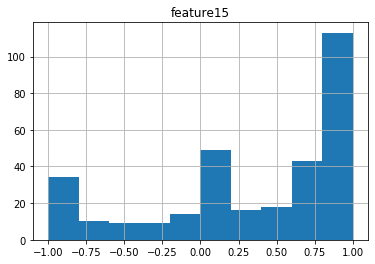

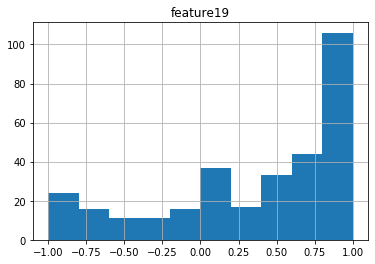

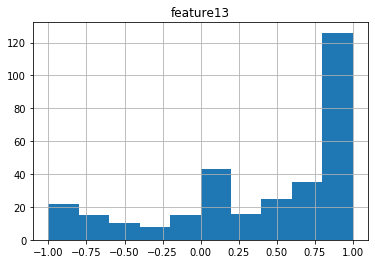

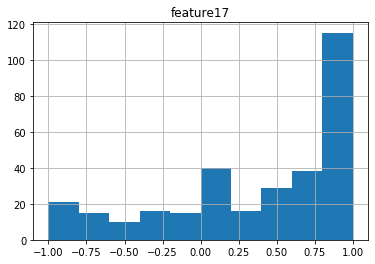

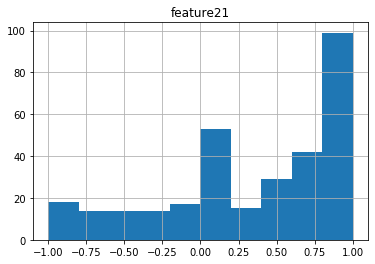

In [7]:
train_.hist(column='feature15')
train_.hist(column='feature19')
train_.hist(column='feature13')
train_.hist(column='feature17')
train_.hist(column='feature21')

In [8]:
reg=LogisticRegression(penalty='none',max_iter=1000)
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)
y1=test['label']
new_test=test.drop(['label'],axis=1)
new_test=np.array(new_test)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

y = train_['label']
new_train = train_.drop(['label'], axis=1)
# print(train_.shape)
# print(y.shape)
stats1=[]
for train_index, test_index in kf.split(train_):
    rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    reg.fit(x_train,y_train)
    ac=accuracy_score(reg.predict(new_test), y1)
    
    stats1.append(list(precision_recall_fscore_support(reg.predict(new_test), y1, average='micro')))
    stats1[-1].append(ac)

# y=test['label']
# new_test=test.drop(['label'],axis=1)
# new_test=np.array(new_test)
# from sklearn.metrics import precision_recall_fscore_support
stats1=pd.DataFrame(stats1)
stats1.columns =['Precision', 'Recall', 'F1-Score', 'Support','Accuracy']
stats1=stats1.drop(['Support'],axis=1)
print("Logistic Regression Stats without PCA")
print(stats1)

Logistic Regression Stats without PCA
   Precision    Recall  F1-Score  Accuracy
0   0.861111  0.861111  0.861111  0.861111
1   0.861111  0.861111  0.861111  0.861111
2   0.861111  0.861111  0.861111  0.861111
3   0.888889  0.888889  0.888889  0.888889
4   0.861111  0.861111  0.861111  0.861111


## PCA for dimensionality reduction

In [9]:
from sklearn.decomposition import PCA
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)
for val in range(90,100,1):
    pca = PCA(val/100)
    y1=test['label']
    new_test=test.drop(['label'],axis=1)
    new_test=np.array(new_test)
    # print(new_test.shape)
    y = train_['label']
    new_train = train_.drop(['label'], axis=1)
    # print(train_.shape)
    # print(y.shape)
    stats1=[]
    ind=0
    for train_index, test_index in kf.split(train_):
        x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #     print(y_test.shape)

    #     components=pca.fit_transform(x_train)
    #     pca.fit(x_train)
    #     x_train= pca.transform(x_train)
    #     pca.fit(x_train)
    #     x_train= pca.transform(x_train)
        pca.fit(x_train)
        x_train= pca.transform(x_train)
        new_test1=pca.transform(new_test)
    #     ind=10
    #     y_train=y_train.values.reshape(-1, 1)
    #     y_test=y_test.values.reshape(-1, 1)
    #     print(y_test.shape)
    #     y_train=pca.transform(y_train)
    #     y_test=pca.transform(y_test)
        reg=LogisticRegression(penalty='none',max_iter=1000)
        reg.fit(x_train,y_train)
        ac=accuracy_score(reg.predict(new_test1), y1)

        stats1.append(list(precision_recall_fscore_support(reg.predict(new_test1), y1, average='micro')))
        stats1[-1].append(ac)

    # y=test['label']
    # new_test=test.drop(['label'],axis=1)
    # new_test=np.array(new_test)
    # from sklearn.metrics import precision_recall_fscore_support
    stats1=pd.DataFrame(stats1)
    stats1.columns =['Precision', 'Recall', 'F1-Score', 'Support','Accuracy']
    stats1=stats1.drop(['Support'],axis=1)
    print("Logistic Regression Stats with PCA with variance", val/100)
    print(stats1)
    print()

Logistic Regression Stats with PCA with variance 0.9
   Precision    Recall  F1-Score  Accuracy
0   0.861111  0.861111  0.861111  0.861111
1   0.861111  0.861111  0.861111  0.861111
2   0.861111  0.861111  0.861111  0.861111
3   0.888889  0.888889  0.888889  0.888889
4   0.888889  0.888889  0.888889  0.888889

Logistic Regression Stats with PCA with variance 0.91
   Precision    Recall  F1-Score  Accuracy
0   0.861111  0.861111  0.861111  0.861111
1   0.861111  0.861111  0.861111  0.861111
2   0.861111  0.861111  0.861111  0.861111
3   0.888889  0.888889  0.888889  0.888889
4   0.888889  0.888889  0.888889  0.888889

Logistic Regression Stats with PCA with variance 0.92
   Precision    Recall  F1-Score  Accuracy
0   0.916667  0.916667  0.916667  0.916667
1   0.861111  0.861111  0.861111  0.861111
2   0.861111  0.861111  0.861111  0.861111
3   0.888889  0.888889  0.888889  0.888889
4   0.916667  0.916667  0.916667  0.916667

Logistic Regression Stats with PCA with variance 0.93
   Preci

# The best model among the 5 folds is determined using the accuracy, higher the accuracy, better is the model. Again, F1 Score/Accuracy is first reported on the validation set and testing is done on the 10% test dataset

## Logistic Regression w/o penalty

In [10]:
reg=LogisticRegression(penalty='none',max_iter=1000)
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)
# y1=test['label']
# new_test=test.drop(['label'],axis=1)
# new_test=np.array(new_test)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

y = train_['label']
new_train = train_.drop(['label'], axis=1)
# print(train_.shape)
# print(y.shape)
stats1=[]
best_accuracy=0
for train_index, test_index in kf.split(train_):
    rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    reg.fit(x_train,y_train)
    ac=accuracy_score(reg.predict(x_test), y_test)
    
    stats1.append(list(precision_recall_fscore_support(reg.predict(x_test), y_test, average='micro')))
    stats1[-1].append(ac)
    if(ac>best_accuracy):
        best_model_nopenalty=reg
        best_accuracy=ac

# y=test['label']
# new_test=test.drop(['label'],axis=1)
# new_test=np.array(new_test)
# from sklearn.metrics import precision_recall_fscore_support
stats1=pd.DataFrame(stats1)
stats1.columns =['Precision', 'Recall', 'F1-Score', 'Support','Accuracy']
stats1=stats1.drop(['Support'],axis=1)
print("Logistic Regression Stats without Penalty")
print(stats1)

Logistic Regression Stats without Penalty
   Precision    Recall  F1-Score  Accuracy
0   0.841270  0.841270  0.841270  0.841270
1   0.873016  0.873016  0.873016  0.873016
2   0.888889  0.888889  0.888889  0.888889
3   0.936508  0.936508  0.936508  0.936508
4   0.888889  0.888889  0.888889  0.888889


In [11]:
y=test['label']
y_numpy=np.array(y)
new_test=test.drop(['label'],axis=1)
new_test=np.array(new_test)
ac=accuracy_score(best_model_nopenalty.predict(new_test), y)
fscore=precision_recall_fscore_support(best_model_nopenalty.predict(new_test), y, average='micro')
print("Testing Best Model with no Penalty")
print("Accuracy=",ac)
print("Precision=",fscore[0])
print("Recall=",fscore[1])
print("F1-Score=",fscore[2])

Testing Best Model with no Penalty
Accuracy= 0.8611111111111112
Precision= 0.8611111111111112
Recall= 0.8611111111111112
F1-Score= 0.8611111111111112


## Logistic Regression with L1 penalty

In [12]:
reg=LogisticRegression(penalty='l1',max_iter=1000,solver='liblinear')
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)
# y1=test['label']
# new_test=test.drop(['label'],axis=1)
# new_test=np.array(new_test)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

y = train_['label']
new_train = train_.drop(['label'], axis=1)
# print(train_.shape)
# print(y.shape)
stats1=[]
best_accuracy=0
for train_index, test_index in kf.split(train_):
    rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    reg.fit(x_train,y_train)
    ac=accuracy_score(reg.predict(x_test), y_test)
    
    stats1.append(list(precision_recall_fscore_support(reg.predict(x_test), y_test, average='micro')))
    stats1[-1].append(ac)
    if(ac>best_accuracy):
        best_model_l1=reg
        best_accuracy=ac

# y=test['label']
# new_test=test.drop(['label'],axis=1)
# new_test=np.array(new_test)
# from sklearn.metrics import precision_recall_fscore_support
stats1=pd.DataFrame(stats1)
stats1.columns =['Precision', 'Recall', 'F1-Score', 'Support','Accuracy']
stats1=stats1.drop(['Support'],axis=1)
print("Logistic Regression Stats L1")
print(stats1)

Logistic Regression Stats L1
   Precision    Recall  F1-Score  Accuracy
0   0.873016  0.873016  0.873016  0.873016
1   0.857143  0.857143  0.857143  0.857143
2   0.888889  0.888889  0.888889  0.888889
3   0.904762  0.904762  0.904762  0.904762
4   0.841270  0.841270  0.841270  0.841270


In [13]:
y=test['label']
y_numpy=np.array(y)
new_test=test.drop(['label'],axis=1)
new_test=np.array(new_test)
ac=accuracy_score(best_model_l1.predict(new_test), y)
fscore=precision_recall_fscore_support(best_model_l1.predict(new_test), y, average='micro')
print("Testing Best Model with L1 Penalty")
print("Accuracy=",ac)
print("Precision=",fscore[0])
print("Recall=",fscore[1])
print("F1-Score=",fscore[2])

Testing Best Model with L1 Penalty
Accuracy= 0.9166666666666666
Precision= 0.9166666666666666
Recall= 0.9166666666666666
F1-Score= 0.9166666666666666


## Logistic Regression with L2

In [14]:
reg=LogisticRegression(penalty='l2',max_iter=1000,solver='liblinear')
kf=model_selection.KFold(n_splits=5)
# train=kf.get_n_splits(train_)
# print(train_.shape)
# print(y.shape)
# y1=test['label']
# new_test=test.drop(['label'],axis=1)
# new_test=np.array(new_test)
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

y = train_['label']
new_train = train_.drop(['label'], axis=1)
# print(train_.shape)
# print(y.shape)
stats1=[]
best_accuracy=0
for train_index, test_index in kf.split(train_):
    rmse=[]
    
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(y_test.shape)
    reg.fit(x_train,y_train)
    ac=accuracy_score(reg.predict(x_test), y_test)
    
    stats1.append(list(precision_recall_fscore_support(reg.predict(x_test), y_test, average='micro')))
    stats1[-1].append(ac)
    if(ac>best_accuracy):
        best_model_l2=reg
        best_accuracy=ac
#         print("YAY")

# y=test['label']
# new_test=test.drop(['label'],axis=1)
# new_test=np.array(new_test)
# from sklearn.metrics import precision_recall_fscore_support
stats1=pd.DataFrame(stats1)
stats1.columns =['Precision', 'Recall', 'F1-Score', 'Support','Accuracy']
stats1=stats1.drop(['Support'],axis=1)
print("Logistic Regression Stats L2")
print(stats1)

Logistic Regression Stats L2
   Precision    Recall  F1-Score  Accuracy
0   0.841270  0.841270  0.841270  0.841270
1   0.841270  0.841270  0.841270  0.841270
2   0.873016  0.873016  0.873016  0.873016
3   0.888889  0.888889  0.888889  0.888889
4   0.873016  0.873016  0.873016  0.873016


In [15]:
y=test['label']
y_numpy=np.array(y)
new_test=test.drop(['label'],axis=1)
new_test=np.array(new_test)
ac=accuracy_score(best_model_l2.predict(new_test), y)
fscore=precision_recall_fscore_support(best_model_l2.predict(new_test), y, average='micro')
print("Testing Best Model with L2 Penalty")
print("Accuracy=",ac)
print("Precision=",fscore[0])
print("Recall=",fscore[1])
print("F1-Score=",fscore[2])

Testing Best Model with L2 Penalty
Accuracy= 0.9166666666666666
Precision= 0.9166666666666666
Recall= 0.9166666666666666
F1-Score= 0.9166666666666666


### Introduction of L1 and L2 penalty has improved the accuracy/F1 Score.

In [16]:
print(best_model_nopenalty)
print(best_model_l1)
print(best_model_l2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


## Plotting ROC-AUC curve for the three best models

Text(0.5, 0, 'FPR')

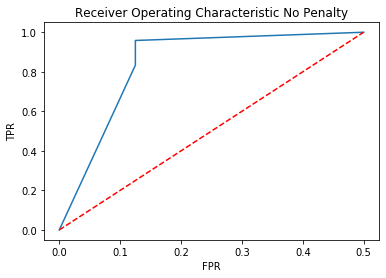

In [17]:
y=test['label']
y_numpy=np.array(y)
new_test=test.drop(['label'],axis=1)
new_test=np.array(new_test)
probab_l2=best_model_l2.predict_proba(new_test)
probab_l1=best_model_l1.predict_proba(new_test)
probab_no=best_model_nopenalty.predict_proba(new_test)

#second column is 1 first column is 0
curve_no_x=[]
curve_no_y=[]
curve_l1_x=[]
curve_l1_y=[]
curve_l2_x=[]
curve_l2_y=[]
# print(y)
for i in range (0,110,10):
    threshold=i/100
    predicted=[]
#     print(threshold)
    for j in probab_no:
        if(j[1]>threshold):
            predicted.append(1)
        else:
            predicted.append(0)
#     print(predicted)
    tpr=0
    fpr=0
    for j in range(len(predicted)):
        if(predicted[j]==y_numpy[j] and y_numpy[j]==1):
            tpr+=1
        if(predicted[j]!=y_numpy[j] and predicted[j]==1):
            fpr+=1
    tpr=tpr/sum(y_numpy)
    fpr=fpr/sum(y_numpy)
    curve_no_x.append(fpr)
    curve_no_y.append(tpr)

plt.plot(curve_no_x,curve_no_y)
plt.plot([0, max(curve_no_x)], [0, max(curve_no_y)],'r--')
plt.title('Receiver Operating Characteristic No Penalty')
plt.ylabel('TPR')
plt.xlabel('FPR')

Text(0.5, 0, 'FPR')

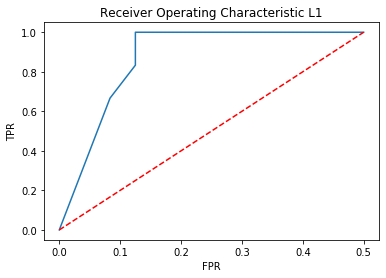

In [18]:
for i in range (0,110,10):
    threshold=i/100
    predicted=[]
#     print(threshold)
    for j in probab_l1:
        if(j[1]>threshold):
            predicted.append(1)
        else:
            predicted.append(0)
#     print(predicted)
    tpr=0
    fpr=0
    for j in range(len(predicted)):
        if(predicted[j]==y_numpy[j] and predicted[j]==1):
            tpr+=1
        if(predicted[j]!=y_numpy[j] and predicted[j]==1):
            fpr+=1
    tpr=tpr/sum(y_numpy)
    fpr=fpr/sum(y_numpy)
    curve_l1_x.append(fpr)
    curve_l1_y.append(tpr)

plt.plot(curve_l1_x,curve_l1_y)
plt.plot([0, max(curve_l1_x)], [0, max(curve_l1_y)],'r--')
plt.title('Receiver Operating Characteristic L1')
plt.ylabel('TPR')
plt.xlabel('FPR')

Text(0.5, 0, 'FPR')

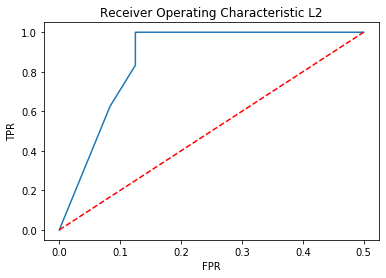

In [19]:
for i in range (0,110,10):
    threshold=i/100
    predicted=[]
#     print(threshold)
    for j in probab_l2:
        if(j[1]>threshold):
            predicted.append(1)
        else:
            predicted.append(0)
#     print(predicted)
    tpr=0
    fpr=0
    for j in range(len(predicted)):
        if(predicted[j]==y_numpy[j] and y_numpy[j]==1):
            tpr+=1
        if(predicted[j]!=y_numpy[j] and predicted[j]==1):
            fpr+=1
    tpr=tpr/sum(y_numpy)
    fpr=fpr/sum(y_numpy)
    curve_l2_x.append(fpr)
    curve_l2_y.append(tpr)

plt.plot(curve_l2_x,curve_l2_y)
plt.plot([0, max(curve_l2_x)], [0, max(curve_l2_y)],'r--')
plt.title('Receiver Operating Characteristic L2')
plt.ylabel('TPR')
plt.xlabel('FPR')

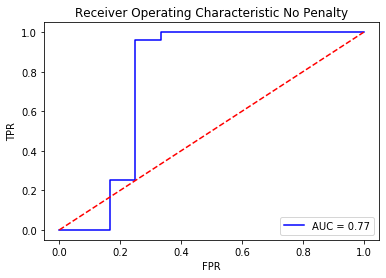

In [20]:
import sklearn.metrics as metrics
preds = probab_no[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_numpy, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic No Penalty')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

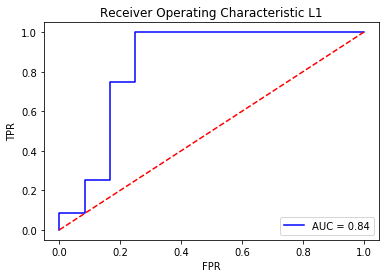

In [21]:
preds = probab_l1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_numpy, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic L1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

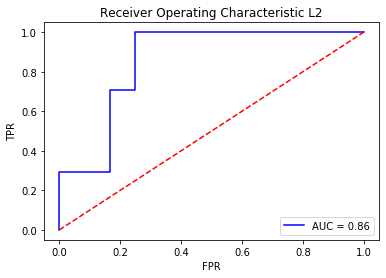

In [22]:
preds = probab_l2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_numpy, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic L2')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

#### The difference between the inbuilt and implemented versions of the ROC-AUC curve is the resolution. I have implemented the curve for only 11 points of threshold, which is much lesser than the inbuilt version. Increasing the resolution results in the plots being similar.